### MLDM - study project (Lecturer: Maevskiy A.A.)
#### Name: Ilya
#### Surname: Zhornichenko
#### Group: TMSS
#### Competition: Sberbank Russian Housing Market

In [149]:
#importing libraries
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [150]:
#parsing data from working directory
data_train = pd.read_csv("/Users/ilyazhornichenko/Desktop/MLDM-project/Data/train.csv")
#parsing train, test dataset
data_test  = pd.read_csv("/Users/ilyazhornichenko/Desktop/MLDM-project/Data/test.csv")
data_marco = pd.read_csv("/Users/ilyazhornichenko/Desktop/MLDM-project/Data/macro.csv")
data_train['price_doc_log'] = np.log1p(data_train['price_doc'])

data_train.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_doc_log
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4,0,13,22,1,0,52,4,5850000,15.581952
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,3,0,15,29,1,10,66,14,6000000,15.607270
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,27,0,4,67,10,5700000,15.555977
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,2,1,4,4,0,0,26,3,13100000,16.388123
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,108,17,135,236,2,91,195,14,16331452,16.608603


In [137]:
#dataframe scale info
data_train.tail()
print(data_train.shape)

(30471, 293)


In [138]:
data_train.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,price_doc_log
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,5,0,15,26,1,2,84,6,7400000,15.816991
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,128,24,98,182,1,82,171,15,25000000,17.034386
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,0,2,12,0,1,11,1,6970959,15.757264
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,1,1,6,31,1,4,65,7,13500000,16.418200
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,2,0,7,16,0,9,54,10,5600000,15.538277


In [139]:
#spotting missing values to be dropped
data_train.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
price_doc_log            0
Length: 293, dtype: int64

<AxesSubplot:>

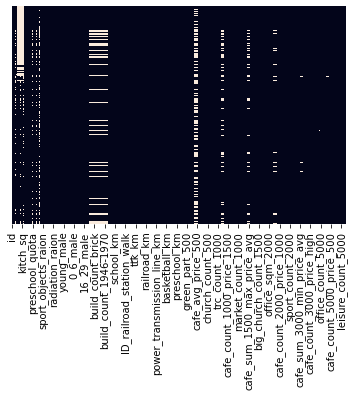

In [140]:
# displaying null-values
sns.heatmap(data_train.isnull(), yticklabels=False, cbar=False)

In [141]:
#General information about missing data
data_train.info

<bound method DataFrame.info of           id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30466  30469  2015-06-30       44     27.0    7.0        9.0       1.0   
30467  30470  2015-06-30       86     59.0    3.0        9.0       2.0   
30468  30471  2015-06-30       45      NaN   10.0       20.0       1.0   
30469  30472  2015-06-30       64     32.0    5.0       15.0       1.0   
30470  30473  2015-06-30       43     28.0    1.0        9.0       1.0   

       build_year  num_room  kitch_sq  ...  cafe_count_5000_price_4000  \
0    

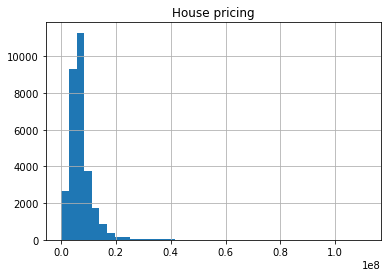

In [142]:
#Finding out the volatility of price_doc feature (this value is about to be predicted )
plt.hist(data_train['price_doc'], bins = 40)
plt.grid()
plt.title("House pricing")
plt.show()

In [143]:
?sns.heatmap
#here we can the split between education and infrastructure

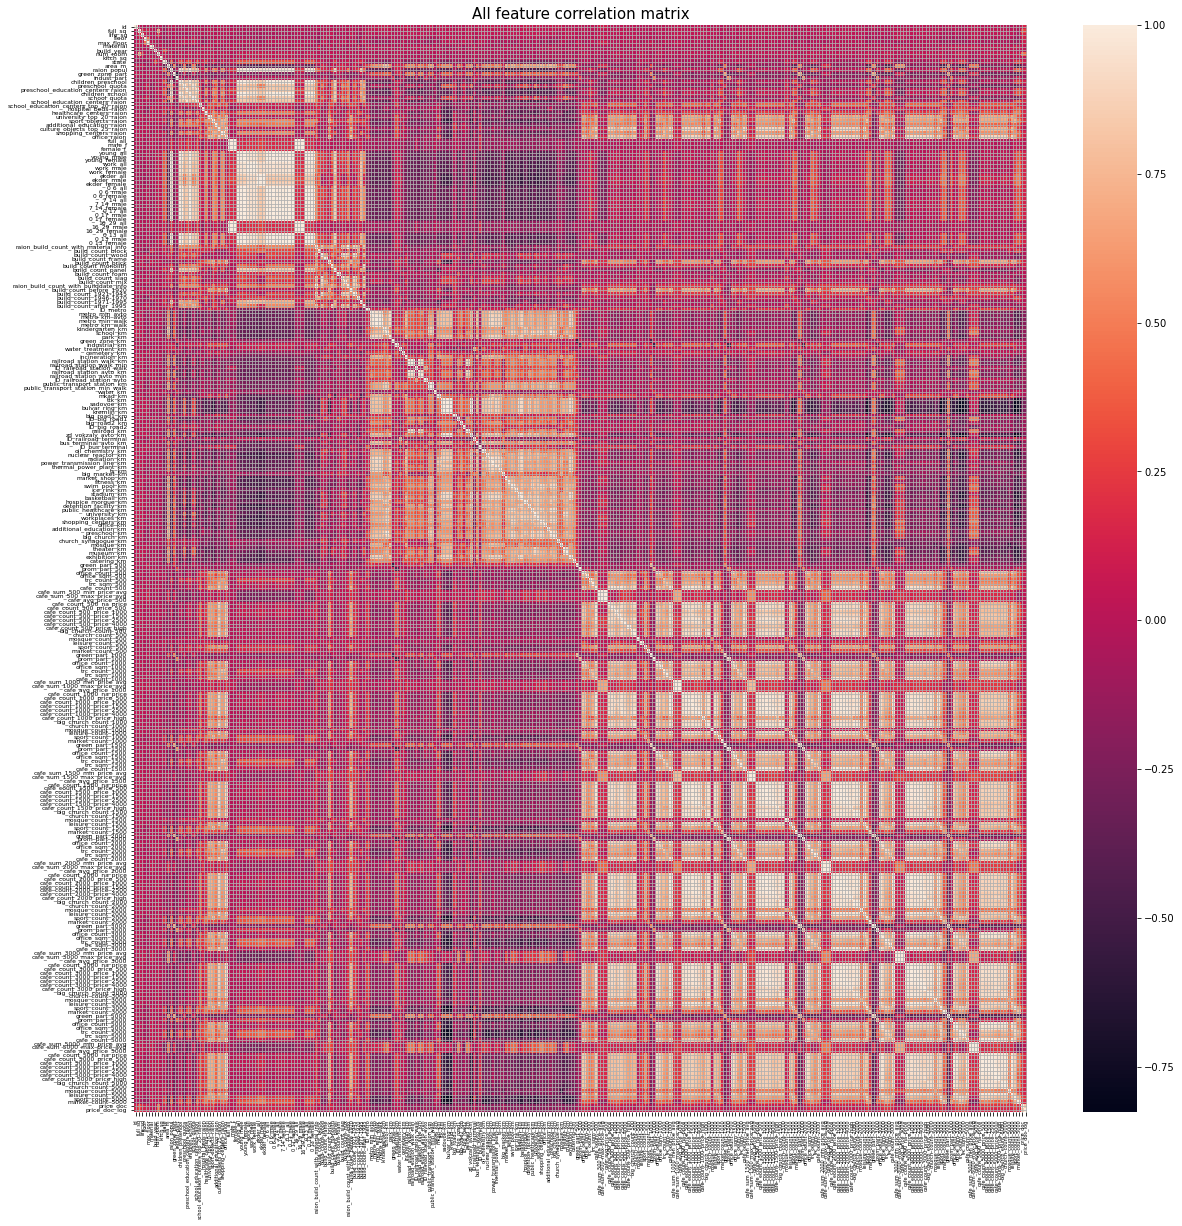

In [144]:
plt.figure(figsize=(20,20))
cols=data_train.corr().columns.values
sns.heatmap(data_train.corr(), xticklabels=cols, yticklabels=cols)
plt.title("All feature correlation matrix",fontsize=15)
plt.xticks(fontsize=5)
plt.yticks(fontsize=6); 
plt.grid()
plt.show()

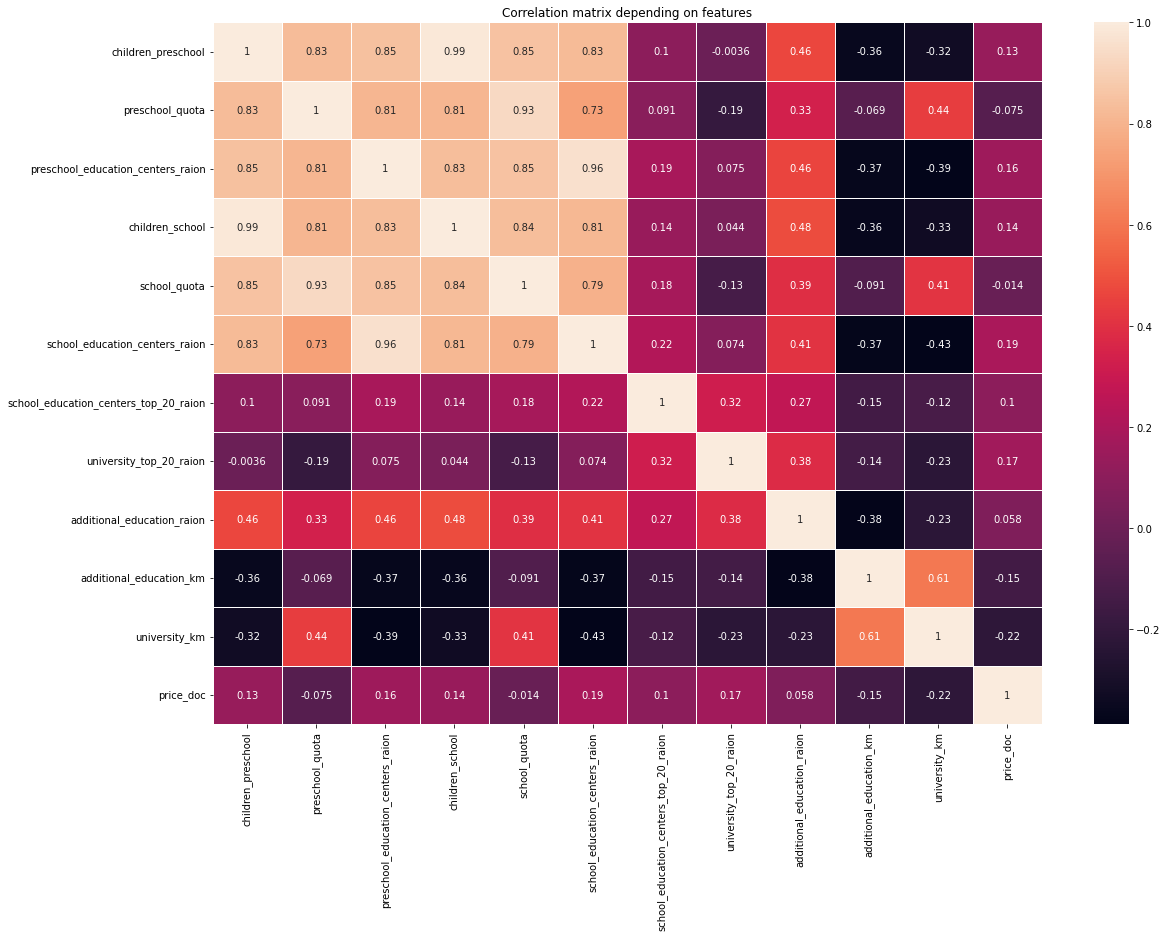

In [145]:
#Correlation matrix is quite difficult to define so it should be decided which features 
#to drop by finding out imoprtance of each feature
# Finding the correlation matrix to find dependencies

train_features = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat1 = data_train[school_chars].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat1, square=False, linewidths=.5, annot=True , robust = True)
plt.xticks(rotation='90')
plt.yticks(rotation='0')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.title("Correlation matrix depending on features")
plt.show()

In [146]:
#Reducing dimensionality of train dataset (Performing PCA analysis)
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

data_train, data_test = make_regression(random_state=0)
data_train_tr, data_train_te, data_test_tr, data_test_te = train_test_split(
    data_train, data_test, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(data_train_tr, data_test_tr)

reg.predict(data_train_te[1:2])

reg.score(data_train_te, data_test_te)
print("score = " , reg.score(data_train_te, data_test_te))

score =  0.4233836905173889


In [147]:
#Split test train data
#target_train,features_train= data_train['price_doc'].values,data_train.drop('price_doc',1).values
#features_train_cat,features_train_cat_enc=data_train.drop('price_doc',1).values,data_train.drop('price_doc',1).values
#features_test,features_test_cat,features_test_cat_enc=data_test.values,data_test.values,data_test.values
#X_train,X_test,y_train,y_test=train_test_split(features_train,target_train,test_size=.2,random_state=1)
#X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

In [ ]:
#data_train['price_doc']

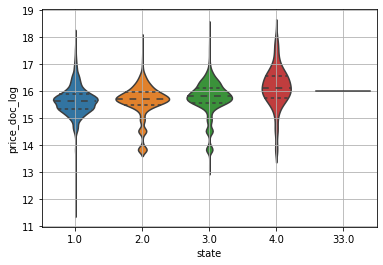

In [152]:
# Price against State (a score for apartment condition); notice the outlier that should probably get remapped to '3':
sns.violinplot(x = 'state', y = 'price_doc_log', data = data_train, inner='quartile')
plt.grid()
plt.show()

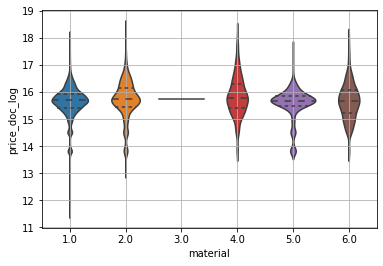

In [155]:
# Price vs. Construction Material; again notice the outlier:
sns.violinplot(x = 'material', y = 'price_doc_log', data = data_train, inner='quartile')
plt.grid()
plt.show()